In [2509]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2510]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2511]:
carPrice = pd.read_csv("CarPrice_Assignment.csv")
pd.set_option('display.max_columns',500)

In [2512]:
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2513]:
#Since car_ID has nothing to with out model so we can drop it right away

carPrice.drop(['car_ID'], axis = 1, inplace = True)

In [2514]:
carPrice['CarName'].head(20)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

In [2515]:
carPrice.CarName.value_counts()

toyota corona                6
peugeot 504                  6
toyota corolla               6
subaru dl                    4
honda civic                  3
                            ..
dodge coronet custom (sw)    1
renault 12tl                 1
chevrolet impala             1
peugeot 304                  1
subaru trezia                1
Name: CarName, Length: 147, dtype: int64

In [2516]:
carPrice['CarName'] = carPrice['CarName'].apply(lambda x: x.split()[0])

In [2517]:
carPrice.loc[(carPrice.CarName == 'porcshce') |(carPrice.CarName == 'porsche'),'CarName'] = 'porsche'
carPrice.loc[(carPrice.CarName == 'vw') |(carPrice.CarName == 'volkswagen')|(carPrice.CarName == 'vokswagen'),'CarName'] = 'volkswagen'
carPrice.loc[(carPrice.CarName == 'nissan') |(carPrice.CarName == 'Nissan'),'CarName'] = 'Nissan'

In [2518]:
carPrice.CarName.value_counts()

toyota         31
Nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
renault         2
toyouta         1
mercury         1
Name: CarName, dtype: int64

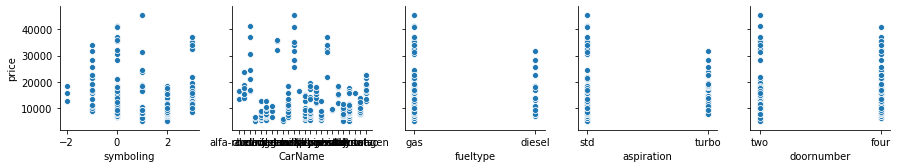

In [2519]:
sns.pairplot(carPrice, x_vars=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber'], y_vars='price')
plt.show()

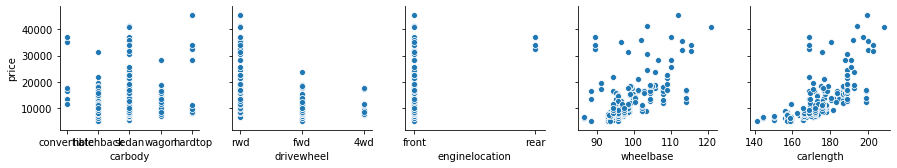

In [2520]:
sns.pairplot(carPrice, x_vars=['carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength'], y_vars='price')
plt.show()

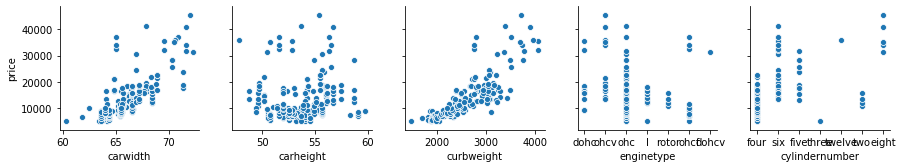

In [2521]:
sns.pairplot(carPrice, x_vars=['carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber'], y_vars='price')
plt.show()

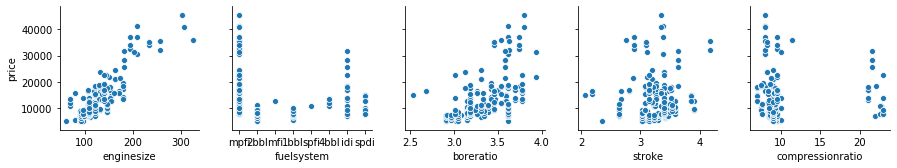

In [2522]:
sns.pairplot(carPrice, x_vars=['enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio'], y_vars='price')
plt.show()

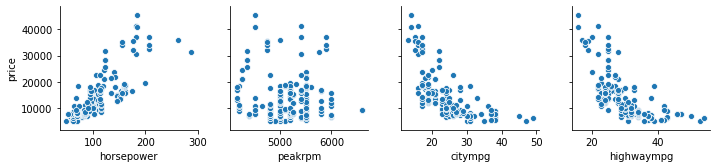

In [2523]:
sns.pairplot(carPrice, x_vars=['horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars='price')
plt.show()

In [2524]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [2525]:
carPrice.CarName.value_counts()

toyota         31
Nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
renault         2
toyouta         1
mercury         1
Name: CarName, dtype: int64

## Data Preparation

In [2526]:
# Creating dummy vars for categorical data - fueltype
status = pd.get_dummies(carPrice['fueltype'])
status = pd.get_dummies(carPrice['fueltype'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('fueltype', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [2527]:
# Creating dummy vars for categorical data - fuelsystem
status = pd.get_dummies(carPrice['fuelsystem'])
status = pd.get_dummies(carPrice['fuelsystem'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('fuelsystem', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0
3,2,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0
4,2,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0


In [2528]:
# Creating dummy vars for categorical data - cylindernumber
status = pd.get_dummies(carPrice['cylindernumber'])
status = pd.get_dummies(carPrice['cylindernumber'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('cylindernumber', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [2529]:
# Creating dummy vars for categorical data - enginetype
status = pd.get_dummies(carPrice['enginetype'])
status = pd.get_dummies(carPrice['enginetype'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('enginetype', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,2,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [2530]:
# Creating dummy vars for categorical data - enginelocation
status = pd.get_dummies(carPrice['enginelocation'])
status = pd.get_dummies(carPrice['enginelocation'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('enginelocation', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear
0,3,alfa-romero,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,audi,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2,audi,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [2531]:
# Creating dummy vars for categorical data - drivewheel
status = pd.get_dummies(carPrice['drivewheel'])
status = pd.get_dummies(carPrice['drivewheel'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('drivewheel', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd
0,3,alfa-romero,std,two,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,alfa-romero,std,two,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,alfa-romero,std,two,hatchback,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,2,audi,std,four,sedan,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,audi,std,four,sedan,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [2532]:
# Creating dummy vars for categorical data - carbody
status = pd.get_dummies(carPrice['carbody'])
status = pd.get_dummies(carPrice['carbody'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('carbody', axis=1)
carPrice.head()

,symboling,CarName,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon
0,3,alfa-romero,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3,alfa-romero,std,two,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,alfa-romero,std,two,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,2,audi,std,four,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,2,audi,std,four,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [2533]:
# Creating dummy vars for categorical data - doornumber
status = pd.get_dummies(carPrice['doornumber'])
status = pd.get_dummies(carPrice['doornumber'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('doornumber', axis=1)
carPrice.head()

,symboling,CarName,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two
0,3,alfa-romero,std,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,alfa-romero,std,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,alfa-romero,std,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
3,2,audi,std,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,2,audi,std,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [2534]:
# Creating dummy vars for categorical data - aspiration
status = pd.get_dummies(carPrice['aspiration'])
status = pd.get_dummies(carPrice['aspiration'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('aspiration', axis=1)
carPrice.head()

,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two,turbo
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,2,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [2535]:
# Creating dummy vars for categorical data - symboling
status = pd.get_dummies(carPrice['symboling'])
status = pd.get_dummies(carPrice['symboling'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('symboling', axis=1)
carPrice.head()

,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two,turbo,-1,0,1,2,3
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [2536]:
# Creating dummy vars for categorical data - CarName
status = pd.get_dummies(carPrice['CarName'])
status = pd.get_dummies(carPrice['CarName'],drop_first=True)
carPrice = pd.concat([carPrice, status], axis=1)
carPrice=carPrice.drop('CarName', axis=1)
carPrice.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two,turbo,-1,0,1,2,3,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,toyouta,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2537]:
#Splitting into train and test
from sklearn.model_selection import train_test_split

carPrice_train, carPrice_test = train_test_split(carPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2538]:
#Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2539]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'carlength', 'carheight', 'price','wheelbase','boreratio','stroke','compressionratio', 'carwidth','peakrpm','enginesize','citympg','highwaympg','horsepower','curbweight']

carPrice_train[num_vars] = scaler.fit_transform(carPrice_train[num_vars])

carPrice_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two,turbo,-1,0,1,2,3,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,toyouta,volkswagen,volvo
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2540]:
carPrice_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,five,four,six,three,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,rear,fwd,rwd,hardtop,hatchback,sedan,wagon,two,turbo,-1,0,1,2,3,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,toyouta,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.909091,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.006993,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.440559,0.181818,0.090909,0.349650,0.300699,0.118881,0.125874,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.013986,0.076923,0.0,0.062937,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.132867,0.006993,0.048951,0.041958
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.288490,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.083624,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.498199,0.387050,0.288490,0.478536,0.460174,0.324786,0.332873,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.117845,0.267406,0.0,0.243703,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.340624,0.083624,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000

# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(carPrice_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing the training data into X_train and y_train

In [2541]:
y_train = carPrice_train.pop('price')
X_train = carPrice_train

In [2542]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2543]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# S
rfe = RFE(lm,14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [2544]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 13),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 21),
 ('horsepower', False, 11),
 ('peakrpm', False, 12),
 ('citympg', False, 31),
 ('highwaympg', False, 22),
 ('gas', False, 20),
 ('2bbl', False, 30),
 ('4bbl', False, 35),
 ('idi', False, 25),
 ('mfi', False, 56),
 ('mpfi', False, 51),
 ('spdi', False, 52),
 ('spfi', False, 55),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 24),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('dohcv', False, 8),
 ('l', False, 3),
 ('ohc', False, 49),
 ('ohcf', False, 6),
 ('ohcv', False, 38),
 ('rotor', True, 1),
 ('rear', True, 1),
 ('fwd', False, 50),
 ('rwd', False, 37),
 ('hardtop', False, 27),
 ('hatchback', False, 26),
 ('sedan', False, 28),
 ('wagon', False, 29),
 ('two', False, 47),
 ('turbo', False, 10),
 (-1, False, 33),
 (0, False, 4

In [2545]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'five',
       'four', 'three', 'twelve', 'two', 'rotor', 'rear', 'bmw', 'porsche'],
      dtype='object')

In [2546]:
X_train.columns[~rfe.support_]

Index([       'wheelbase',        'carlength',        'carheight',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',              'gas',
                   '2bbl',             '4bbl',              'idi',
                    'mfi',             'mpfi',             'spdi',
                   'spfi',              'six',            'dohcv',
                      'l',              'ohc',             'ohcf',
                   'ohcv',              'fwd',              'rwd',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'two',            'turbo',
                       -1,                  0,                  1,
                        2,                  3,      'alfa-romero',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'maxda',            'maz

## Building model using statsmodel, for the detailed statistics

In [2547]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2548]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.55e-67
Time:                        21:59:07   Log-Likelihood:                 208.67
No. Observations:                 143   AIC:                            -387.3
Df Residuals:                     128   BIC:                            -342.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2315      0.039     -5.966      0.0

In [2549]:
# Since some of the features are clearly not significant so we can drop them

# Dropping two
X_train_new = X_train_rfe.drop(["two"], axis = 1)

In [2550]:
# rebuilding the model without the two

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.35e-68
Time:                        21:59:07   Log-Likelihood:                 208.57
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     129   BIC:                            -347.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2284      0.038     -6.009      0.0

In [2551]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'five', 'four', 'three', 'twelve', 'rotor', 'rear', 'bmw', 'porsche'],
      dtype='object')

In [2552]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.84
3,enginesize,26.41
7,four,12.85
2,curbweight,9.41
1,carwidth,5.86
4,boreratio,5.61
10,rotor,5.46
9,twelve,3.04
6,five,2.87
5,stroke,2.46


In [2553]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping four
X_train_new_temp = X_train_new.drop(["four"], axis = 1)

In [2554]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.17e-64
Time:                        21:59:08   Log-Likelihood:                 196.36
No. Observations:                 143   AIC:                            -366.7
Df Residuals:                     130   BIC:                            -328.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0945      0.029     -3.297      0.0

In [2555]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.45
2,curbweight,9.38
3,enginesize,8.47
1,carwidth,5.85
4,boreratio,2.32
12,porsche,1.85
8,twelve,1.76
10,rear,1.71
5,stroke,1.51
6,five,1.40


In [2556]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping curbweight
X_train_new_temp = X_train_new_temp.drop(["curbweight"], axis = 1)

In [2557]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.22e-63
Time:                        21:59:08   Log-Likelihood:                 190.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     131   BIC:                            -320.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1024      0.030     -3.439      0.0

In [2558]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.28
2,enginesize,5.02
1,carwidth,4.27
3,boreratio,2.23
9,rear,1.71
11,porsche,1.69
7,twelve,1.63
4,stroke,1.50
5,five,1.40
8,rotor,1.22


In [2559]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping twelve
X_train_new_temp = X_train_new_temp.drop(["twelve"], axis = 1)

In [2560]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.91e-63
Time:                        21:59:09   Log-Likelihood:                 186.46
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     132   BIC:                            -318.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1252      0.029     -4.316      0.0

In [2561]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping boreratio
X_train_new_temp = X_train_new_temp.drop(["boreratio"], axis = 1)

In [2562]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.29e-63
Time:                        21:59:09   Log-Likelihood:                 184.55
No. Observations:                 143   AIC:                            -349.1
Df Residuals:                     133   BIC:                            -319.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1518      0.026     -5.923      0.0

In [2563]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping stroke
X_train_new_temp = X_train_new_temp.drop(["stroke"], axis = 1)

In [2564]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.78e-64
Time:                        21:59:09   Log-Likelihood:                 183.49
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     134   BIC:                            -322.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1776      0.018     -9.880      0.0

In [2565]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping porsche
X_train_new_temp = X_train_new_temp.drop(["porsche"], axis = 1)

In [2566]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.29e-64
Time:                        21:59:09   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -346.9
Df Residuals:                     135   BIC:                            -323.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1859      0.018    -10.527      0.0

In [2567]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.10
1,carwidth,3.38
2,enginesize,3.20
3,five,1.28
5,rotor,1.14
6,rear,1.09
7,bmw,1.09
4,three,1.06


In [2568]:
# Since some of the features have a VIF which is much greater so we have to drop them

# Dropping five
X_train_new_temp = X_train_new_temp.drop(["five"], axis = 1)

In [2569]:
# rebuilding the model without the curbweight

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new_temp)

lm = sm.OLS(y_train,X_train_lm).fit()   

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.62e-64
Time:                        21:59:10   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1976      0.017    -11.724      0.0

In [2570]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new_temp
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.11
2,enginesize,3.02
1,carwidth,2.75
4,rotor,1.12
6,bmw,1.09
5,rear,1.08
3,three,1.05


## Residual Analysis of the train data

plotting the histogram of the error terms and see what it looks like.

In [2571]:
y_train_price = lm.predict(X_train_lm)

In [2572]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

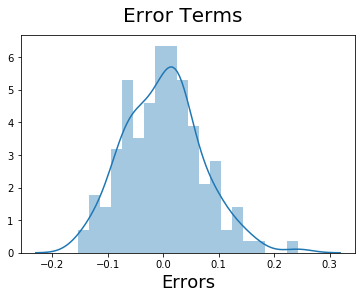

In [2573]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [2574]:
# Applying the scaling on the test sets
num_vars = [ 'carlength', 'carheight', 'price','wheelbase','boreratio','stroke','compressionratio', 'carwidth','peakrpm','enginesize','citympg','highwaympg','horsepower','curbweight']

carPrice_test[num_vars] = scaler.transform(carPrice_test[num_vars])

In [2575]:
y_test = carPrice_test.pop('price')
X_test = carPrice_test

In [2576]:
X_train_new_temp.columns

Index(['const', 'carwidth', 'enginesize', 'three', 'rotor', 'rear', 'bmw'], dtype='object')

In [2577]:
X_test.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',              'gas',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',             'spfi',
                   'five',             'four',              'six',
                  'three',           'twelve',              'two',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   'rear',              'fwd',              'rwd',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'two',            'turbo',
                       -1,                  0,                

In [2578]:
col_pred = list(X_train_new_temp.columns)
col_pred.remove('const')
col_pred

['carwidth', 'enginesize', 'three', 'rotor', 'rear', 'bmw']

In [2579]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col_pred]

In [2580]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2581]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

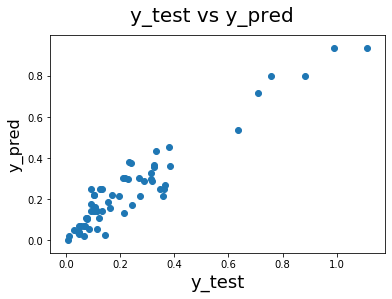

In [2582]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [2584]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9013443522816883

# The r2_score calculated is 0.9013443522816883 which is 90.13%